In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
file_id = '1JvD4Ss2yS3d9X36YkWqmqZXLamNWLSFJ'
link = f'https://drive.google.com/uc?id={file_id}'
data = pd.read_csv(link)

In [17]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [21]:
data.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [22]:
# summary Statistics and Descriptive Analysis
summary_stats = df.describe()
print(summary_stats)

            Temp_C  Dew Point Temp_C    Rel Hum_%  Wind Speed_km/h  \
count  8784.000000       8784.000000  8784.000000      8784.000000   
mean      8.798144          2.555294    67.431694        14.945469   
std      11.687883         10.883072    16.918881         8.688696   
min     -23.300000        -28.500000    18.000000         0.000000   
25%       0.100000         -5.900000    56.000000         9.000000   
50%       9.300000          3.300000    68.000000        13.000000   
75%      18.800000         11.800000    81.000000        20.000000   
max      33.000000         24.400000   100.000000        83.000000   

       Visibility_km    Press_kPa  
count    8784.000000  8784.000000  
mean       27.664447   101.051623  
std        12.622688     0.844005  
min         0.200000    97.520000  
25%        24.100000   100.560000  
50%        25.000000   101.070000  
75%        25.000000   101.590000  
max        48.300000   103.650000  


<Axes: >

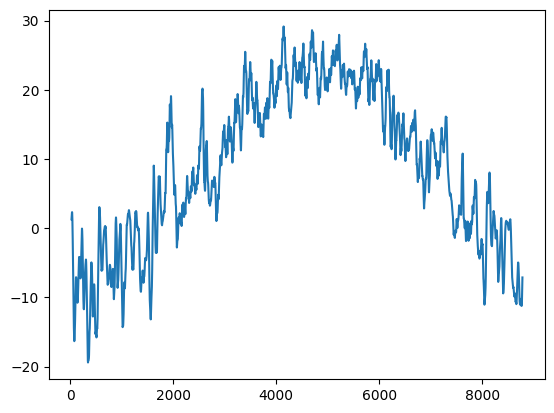

In [30]:
data['Temp_C'].rolling(window=30).mean().plot()

<Axes: xlabel='Date/Time'>

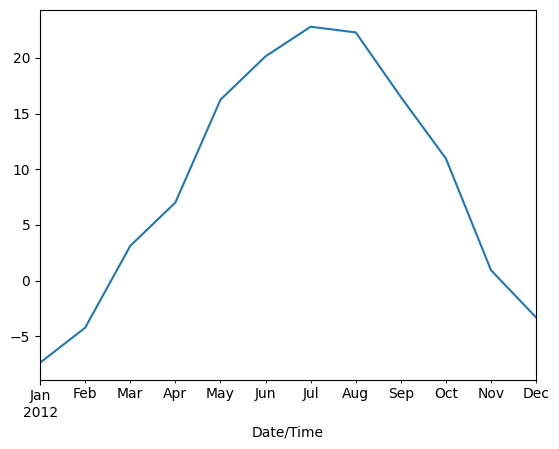

In [23]:
# plot the average temperature
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df.set_index('Date/Time', inplace=True)
df['Temp_C'].resample('M').mean().plot()

In [26]:
# calculate the average temperature for each weather condition
grouped_data = df.groupby('Weather')['Temp_C'].mean()
print(grouped_data)

Weather
Clear                                       6.825716
Cloudy                                      7.970544
Drizzle                                     7.353659
Drizzle,Fog                                 8.067500
Drizzle,Ice Pellets,Fog                     0.400000
Drizzle,Snow                                1.050000
Drizzle,Snow,Fog                            0.693333
Fog                                         4.303333
Freezing Drizzle                           -5.657143
Freezing Drizzle,Fog                       -2.533333
Freezing Drizzle,Haze                      -5.433333
Freezing Drizzle,Snow                      -5.109091
Freezing Fog                               -7.575000
Freezing Rain                              -3.885714
Freezing Rain,Fog                          -2.225000
Freezing Rain,Haze                         -4.900000
Freezing Rain,Ice Pellets,Fog              -2.600000
Freezing Rain,Snow Grains                  -5.000000
Haze                                  

In [29]:
# finding the maximum, minimum, mean and standard deviation of the temperature
temps = data['Temp_C']
print('max:', temps.max(), 'on', data['Date/Time'][temps.argmax()])
print('min:', temps.min(), 'on', data['Date/Time'][temps.argmin()])
print('mean:', temps.mean())
print('std dev:', temps.std())

max: 33.0 on 6/21/2012 15:00
min: -23.3 on 1/15/2012 8:00
mean: 8.798144353369764
std dev: 11.687882769691276
